In [ ]:
import ROOT
import JupyROOT.helpers.utils
JupyROOT.helpers.utils.GetGeometryDrawer = lambda:None # magic fix to make ROOT faster
import numpy as np
from analysis_tools.utils import DotDict
from config.ul_2018_ZZ_v12 import config as config_zz_ul
from cmt.base_tasks.base import InputData
import uproot
import hist
import matplotlib.pyplot as plt
import matplotlib
import mplhep as hep
plt.style.use(hep.style.CMS)
import pickle
from tqdm.auto import tqdm
import pandas as pd
import os

Welcome to JupyROOT 6.24/07


In [ ]:
datasets_split = [f"dy_ptz{i}" for i in range(1, 6+1)] + ["dy_0j", "dy_1j", "dy_2j"]

In [ ]:
def get_input(dataset, index):
    return InputData(config_name="ul_2018_ZZ_v12", dataset_name=dataset, file_index=index).output()[0].path
def get_array(file):
    return ROOT.RDataFrame("Events", file).Define("LHE_NpNLOInt", "(int)LHE_NpNLO").AsNumpy(["genWeight", "LHE_NpNLOInt", "LHE_Vpt"])
def merge_arrays(ars):
    return {key : np.concatenate(tuple(x[key] for x in ars)) for key in ars[0].keys()}
def fill_h(h, ar):
    h.fill(LHE_NpNLO=ar["LHE_NpNLOInt"], LHE_Vpt=ar["LHE_Vpt"], weight=ar["genWeight"])
def fill_h_one(h, ar): # fill +1 or -1 as weight 
    h.fill(LHE_NpNLO=ar["LHE_NpNLOInt"], LHE_Vpt=ar["LHE_Vpt"], weight=np.where(ar["genWeight"]>0, 1., -1.))
def fill_h_all(h, ars):
    for ar in ars:
        fill_h(h, ar)
def fill_h_all_one(h, ars):
    for ar in ars:
        fill_h_one(h, ar)

def make_hist():
    return hist.Hist(
        hist.axis.Integer(0, 5, name="LHE_NpNLO"),
        hist.axis.Variable([0, 50, 100, 250, 400, 650], name="LHE_Vpt"),
        storage="weight"
    )

In [24]:
ars_incl_noskim = [get_array(get_input("dy_aux", index)) for index in tqdm(range(0, 50))]

  0%|          | 0/50 [00:00<?, ?it/s]

In [77]:
ars_incl = [get_array(get_input("dy", index)) for index in tqdm(range(10, 30))]

  0%|          | 0/20 [00:00<?, ?it/s]

In [85]:
merge_arrays([old_ars_incl] + ars_incl)["genWeight"].__len__()

37240929

In [25]:
ar_m_noskim = merge_arrays(ars_incl_noskim)

In [9]:

ar_m = merge_arrays([old_ars_incl] + ars_incl)

NameError: name 'old_ars_incl' is not defined

In [26]:
with open('/grid_mnt/data__data.polcms/cms/cuisset/ZHbbtautau/framework/studies/stitching/dy_incl_noskim.pickle', 'wb') as handle:
    pickle.dump(merge_arrays(ars_incl_noskim), handle)

In [87]:
# with open('/grid_mnt/data__data.polcms/cms/cuisset/ZHbbtautau/framework/studies/stitching/dy_incl.pickle', 'rb') as handle:
#     old_ars_incl = pickle.load(handle)
# with open('/grid_mnt/data__data.polcms/cms/cuisset/ZHbbtautau/framework/studies/stitching/dy_incl.pickle', 'wb') as handle:
#     pickle.dump(merge_arrays([old_ars_incl] + ars_incl), handle)


In [27]:

df = pd.DataFrame(ar_m_noskim)
df

,genWeight,LHE_NpNLOInt,LHE_Vpt
0,25259.673828,0,0.000000
1,25259.673828,0,0.000000
2,25259.673828,0,0.000000
3,25259.673828,0,24.178734
4,25259.673828,0,0.000000
...,...,...,...
54817930,-25259.673828,1,41.489891
54817931,25259.673828,0,25.172276
54817932,25259.673828,0,0.000000
54817933,25259.673828,2,255.664566


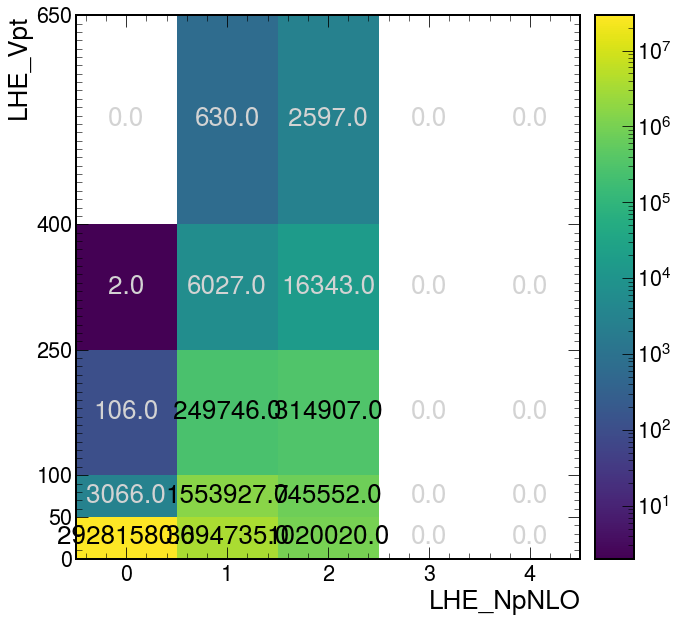

In [33]:
h, h1 = make_hist(), make_hist()
fill_h(h, ar_m_noskim)
fill_h_one(h1, ar_m_noskim)
_, cbar, _ = hep.hist2dplot(h1, norm=matplotlib.colors.LogNorm(), labels=True)

In [72]:
np.sqrt(h.variances())/h.values()

/scratch/cuisset/cmt/tmp/ipykernel_232362/1013610287.py:1: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(h.variances())/h.values()


array([[ 4.75084059e-04,             nan,             nan,
                    nan,             nan],
       [ 8.79134425e-04,  1.75374660e-03,  3.85650967e-03,
         2.13499225e-02,  6.51109805e-02],
       [-7.79961221e-03,  2.93627201e-03,  2.19952268e-03,
         6.12540094e-03,  1.16369570e-02],
       [ 7.71362431e+00, -1.16715934e-02, -1.34132862e-02,
        -1.97567811e-01,  5.13371211e-01],
       [            nan,             nan,             nan,
                    nan,             nan]])

## exclusive computations

In [4]:
get_input("dy_ptz1_aux", 100)

'root://xrootd-cms.infn.it///store/mc/RunIISummer20UL18NanoAODv9/DYJetsToLL_LHEFilterPtZ-0To50_MatchEWPDG20_TuneCP5_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/40000/95488435-3345-1D4C-81C2-309BF5D3C803.root'

Warning in <TClass::Init>: no dictionary for class __pair_base<edm::Hash<1>,edm::ParameterSetBlob> is available


In [4]:
ar = get_array(get_input("dy_ptz1_aux", 100))

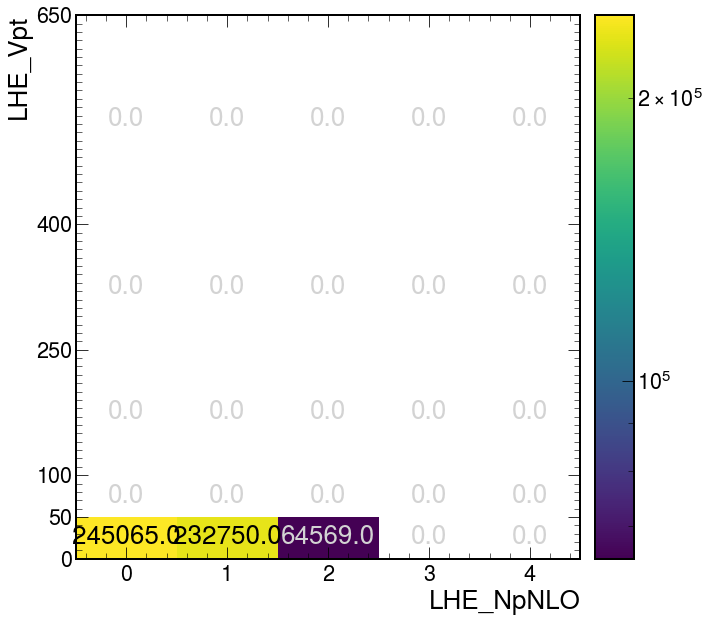

In [34]:
h, h1 = make_hist(), make_hist()
fill_h(h, ar)
fill_h_one(h1, ar)
_, cbar, _ = hep.hist2dplot(h1, norm=matplotlib.colors.LogNorm(), labels=True)

In [ ]:
def get_input_v2(dataset, i):
    return InputData(config_name="ul_2018_ZZ_v12", dataset_name=dataset, file_index=i).dataset.get_files(
                    os.path.expandvars("$CMT_TMP_DIR/%s/" % "ul_2018_ZZ_v12"),
                    index=i, check_empty=False)

In [ ]:
input_files_all = {dataset : [] for dataset in datasets_split}
for dataset in datasets_split:
    try:
        for i in range(10):
            print(dataset + " " + i)
            inp = get_input_v2(dataset+"_aux", i)
            print(inp)
            input_files_all[dataset].append(inp)
    except IndexError:
        pass
input_files_all

In [ ]:
from concurrent.futures import ProcessPoolExecutor
files = [file for dataset, l_files in input_files_all.items() for file in l_files]
files_datasets = [dataset for dataset, l_files in input_files_all.items() for file in l_files]
with ProcessPoolExecutor(max_workers=10) as executor:
    res = list(tqdm(executor.map(get_array, files), total=len(files)))
res

In [35]:
ars_dataset = {}
for dataset in tqdm(datasets_split):
    file = get_input(dataset+"_aux", 0)
    ars_dataset[dataset] = get_array(get_input(dataset, 0))

  0%|          | 0/9 [00:00<?, ?it/s]

In [49]:
import copy
with open('/grid_mnt/data__data.polcms/cms/cuisset/ZHbbtautau/framework/studies/stitching/dy_excl_noskim.pickle', 'wb') as handle:
    # use merge_arrays to avoid needing ROOT to unpickle
    pickle.dump({dataset : merge_arrays([x]) for dataset, x in ars_dataset.items()}, handle)

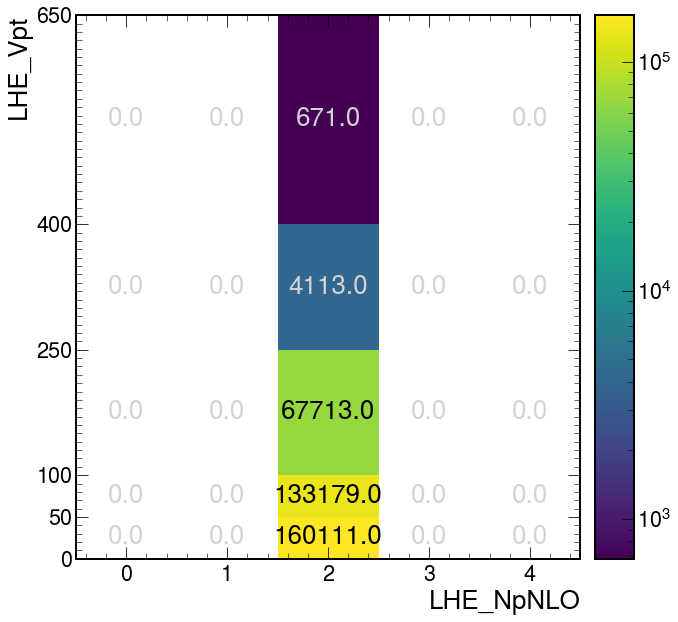

In [45]:
ar = ars_dataset["dy_2j"]
h, h1 = make_hist(), make_hist()
fill_h(h, ar)
fill_h_one(h1, ar)
_, cbar, _ = hep.hist2dplot(h1, norm=matplotlib.colors.LogNorm(), labels=True)

## exclusive studies

In [5]:
ars_dataset = {}
for dataset in datasets_split:
    file = get_input(dataset+"_aux", 0)
    ars_dataset[dataset] = ROOT.RDataFrame("Events", file).Range(0, 5000).Define("LHE_NjetsInt", "(int)LHE_Njets").Define("LHE_NpLOInt", "(int)LHE_NpLO").Define("LHE_NpNLOInt", "(int)LHE_NpNLO").AsNumpy(["genWeight", "LHE_NjetsInt", "LHE_HT", "LHE_NpLOInt", "LHE_NpNLOInt", "LHE_Vpt"])


input_line_116:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<float>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
input_line_123:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<int>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [6]:
ars_dataset

{'dy_ptz1': {'genWeight': ndarray([ 24238.383,  24238.383, -24238.383, ...,  24238.383,  24238.383,
            24238.383], dtype=float32),
  'LHE_NjetsInt': ndarray([1, 1, 3, ..., 1, 1, 1], dtype=int32),
  'LHE_HT': ndarray([23.780132, 33.272827, 72.781364, ..., 20.180021, 23.77388 ,
            8.04427 ], dtype=float32),
  'LHE_NpLOInt': ndarray([255, 255, 255, ..., 255, 255, 255], dtype=int32),
  'LHE_NpNLOInt': ndarray([0, 1, 2, ..., 0, 0, 0], dtype=int32),
  'LHE_Vpt': ndarray([23.780132, 33.272827, 28.539587, ..., 20.180021, 23.77388 ,
            8.04427 ], dtype=float32)},
 'dy_ptz2': {'genWeight': ndarray([ 11319.365, -11319.365,  11319.365, ...,  11319.365,  11319.365,
           -11319.365], dtype=float32),
  'LHE_NjetsInt': ndarray([2, 2, 2, ..., 1, 2, 1], dtype=int32),
  'LHE_HT': ndarray([148.30157 ,  70.58647 ,  55.61422 , ...,  52.84    ,  62.741024,
            61.45225 ], dtype=float32),
  'LHE_NpLOInt': ndarray([255, 255, 255, ..., 255, 255, 255], dtype=int32),
  'LH